# Perceptron

Perceptrons are **neurally inspired learning devices** simulated on a digital computer. They were introduced by Frank Rosenblatt who initially simulated them on an IBM 704 computer at Cornell Aeronautical Laboratory in 1957.

The **aim** of a perceptron is to learn to **distinguish** whether an input is a **member of class A or B** based on examples of each class together with correct classification (supervised learning). Rosenblatt called them perceptrons to emphasise their perceptive, rather than logical, abilities.

## Working principle
Class members &mdash; any finite number being allowed &mdash; are represented by vectors $x^c$, each vector having $(n-1)$ elements, where $x_i^c$ denotes the $i$-th element of the $c$-th vector ($c$ stands for "case", that is, a specific training example).

Given the vector $x^c$, a perceptron computes:

$$\sum_{i=1}^{n-1} w_ix_i^c - t$$

where $w_i$ are weights adjustable during learning similar to synapses in the brain, $x_i^c$ are inputs, and $t$ is an adjustable threshold. In other words, a perceptron **compares a weighted sum of inputs to a threshold**. Note that like weights $w$, $t$ is also adjusted during the training. 

Mathematically, $\sum_{i=1}^{n-1} w_ix_i^c$ is the [dot product](https://en.wikipedia.org/wiki/Dot_product). So, we can compute the above expression as follows: 

In [71]:
import torch

# Weight vector w, input vector x, and threshold t
w = torch.tensor([0.5, 0.1, 0.7])
x = torch.tensor([1.0, 1.0, 0.0])
t = 0.4

def perceptron(w, x, t):
    """Compute the dot product between w and x, and subtract the threshold t."""
    return torch.dot(w, x) - t

print("Comparison of a weighted sum to a threshold:", perceptron(w, x, t))


Comparison of a weighted sum to a threshold: tensor(0.2000)


Finally, the result of $\sum_{i=1}^{n-1} w_ix_i^c - t$ &mdash; the comparison of the weighted sum to threshold $t$ &mdash; is fed into an **activation function** $f$ which computes the perceptron's output:

$$o^c = f(\sum_{i=1}^{n-1} w_ix_i^c - t)$$

With this, we can now visualise the perceptron:

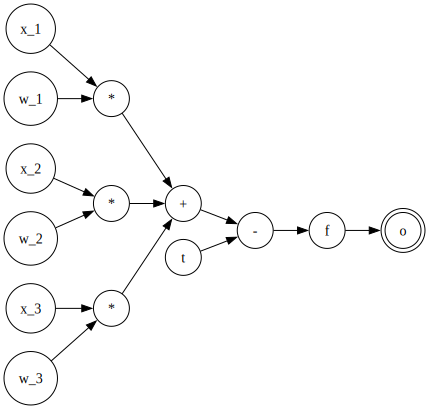

In [72]:
# Illustration of a simple perceptron
%matplotlib inline
import graphviz
dot = graphviz.Digraph('perceptron', graph_attr={'rankdir': 'LR'}, comment='Simple perceptron')

dot.node('x_1', 'x_1', shape='circle')
dot.node('x_2', 'x_2', shape='circle')
dot.node('x_3', 'x_3', shape='circle')

dot.node('w_1', 'w_1', shape='circle')
dot.node('w_2', 'w_2', shape='circle')
dot.node('w_3', 'w_3', shape='circle')

dot.node('m1', '*', shape='circle')
dot.node('m2', '*', shape='circle')
dot.node('m3', '*', shape='circle')

dot.node('sum', '+', shape='circle')

dot.node('t', 't', shape='circle')
dot.node('sub', '-', shape='circle')

dot.node('act', 'f', shape='circle')
dot.node('out', 'o', shape='doublecircle')

dot.edge('x_1', 'm1')
dot.edge('w_1', 'm1')
dot.edge('x_2', 'm2')
dot.edge('w_2', 'm2')
dot.edge('x_3', 'm3')
dot.edge('w_3', 'm3')

dot.edge('m1', 'sum')
dot.edge('m2', 'sum')
dot.edge('m3', 'sum')

dot.edge('sum', 'sub')
dot.edge('t', 'sub')

dot.edge('sub', 'act')
dot.edge('act', 'out')

dot

## Computing perceptron's output

The output of a perceptron is computed as:

$$o^c=f(net^c)=f(\sum_{i=1}^{n-1}w_ix_i^c - t) = \begin{cases} 
1  & net^c > 0 \\
-1 & \textrm{otherwise}
\end{cases}$$

where $f$ can be viewed as an **activation function**. So, we need to enhance the above code as follows:


In [73]:
def perceptron(w, x, t):
    """Compute the dot product between w and x, and subtract the threshold t."""
    net = torch.dot(w, x) - t

    if net > 0:
        return 1.0
    else:
        return 0.0


# Weight vector w, input vector x, and threshold t
w = torch.tensor([0.5, 0.1, 0.7])
x = torch.tensor([1.0, 1.0, 0.0])

for t in [0.0, 0.4, 0.7]:
    print(f"For t={t}, perceptron's output is {perceptron(w, x, t)}")

For t=0.0, perceptron's output is 1.0
For t=0.4, perceptron's output is 1.0
For t=0.7, perceptron's output is 0.0


To avoid distinguishing threshold $t$ from weights $w$ and, more importantly, adjusting (learning) $t$ in the same way as $w$, it is a convention to consider input vectors $x^c$ have $n$ elements instead of $n-1$, with the $n$-th element being always 1. Then, $w_n$ takes the role of $-t$, and the above expression for perceptron's output simplifies to:

$$o^c=f(\sum_{i=1}^{n}w_ix_i^c)$$

We can therefore re-write the above perceptron code as follows:

In [74]:
def perceptron(w, x):
    """Compute the dot product between w and x, and subtract the threshold t."""
    net = torch.dot(w, x) - t

    if net > 0:
        return 1.0
    else:
        return 0.0


# Weight vector w, input vector x, and threshold t
w = torch.tensor([0.5, 0.1, 0.7, 0.3])
x = torch.tensor([1.0, 1.0, 0.0, 1.0])

print(f"For t={w[-1]}, perceptron's output is {perceptron(w, x)}")

For t=0.30000001192092896, perceptron's output is 1.0


## Perceptron convergence theorem

With contributions by other researchers, Rosenblatt proved the **perceptron convergence theorem**.

💡 **Theorem.** If there exist any weights that yield the desired output for all training cases, one such set will be found in a finite number of steps if you:

* start with all weights at zero,
* iterate over and over through the training set, and
* modify $w$ for each $x^c$ as:

$$w_i^{new} = w_i^{old} + \frac{\eta}{2}(d^c - o^c)x_i^c$$

where $\eta$ is any positive constant, $d^c$ is the expected output and $o^c$ is the actual output for example (case) $c$.

Let's see the perceptron convergence theorem in action.

In [91]:
def weight_update_rule(w_old, eta, d, o, x):
    return w_old + (eta/2) * (d-o) * x

import random

def draw_training_sample():
    """Draw a random training sample."""
    x1 = round(random.random(), 2)

    if x1 <= 0.5:
        d = 0.0
    else:
        d = 1.0

    return torch.tensor([0.1, x1, 1.0]), d

w = torch.tensor([0.0, 0.0, 0.0])
eta = 1.0
print("Initial weights:", w)

samples = 500000

for i in range(samples):
    x, d = draw_training_sample()
    o = perceptron(w, x)
    w = weight_update_rule(w, eta, d, o, x)
    if i < 10:
        print(f"Sample {i}: {x}, d: {d}, o: {o} => w_new: {w}")
    elif i % (samples/10) == 0:
        print(f"Sample {i}: {x}, d: {d}, o: {o} => w_new: {w}")


# Validation data set
x, d = [], []
x.append(torch.tensor([0.1, 0.11, 1.0]))
d.append(0.0)
x.append(torch.tensor([0.1, 0.91, 1.0]))
d.append(1.0)
x.append(torch.tensor([0.1, 0.82, 1.0]))
d.append(1.0)
x.append(torch.tensor([0.1, 0.61, 1.0]))
d.append(1.0)
x.append(torch.tensor([0.1, 0.21, 1.0]))
d.append(0.0)
x.append(torch.tensor([0.1, 0.38, 1.0]))
d.append(0.0)
x.append(torch.tensor([0.1, 0.48, 1.0]))
d.append(0.0)
x.append(torch.tensor([0.1, 0.65, 1.0]))
d.append(1.0)

for i in range(len(x)):
    o = perceptron(w, x[i])
    print(f"Validation sample {i}: {x[i]}, d: {d[i]}, o: {o}")


Initial weights: tensor([0., 0., 0.])
Sample 0: tensor([0.1000, 0.5200, 1.0000]), d: 1.0, o: 0.0 => w_new: tensor([0.0500, 0.2600, 0.5000])
Sample 1: tensor([0.1000, 0.3800, 1.0000]), d: 0.0, o: 0.0 => w_new: tensor([0.0500, 0.2600, 0.5000])
Sample 2: tensor([0.1000, 0.6300, 1.0000]), d: 1.0, o: 0.0 => w_new: tensor([0.1000, 0.5750, 1.0000])
Sample 3: tensor([0.1000, 0.3900, 1.0000]), d: 0.0, o: 1.0 => w_new: tensor([0.0500, 0.3800, 0.5000])
Sample 4: tensor([0.1000, 0.2200, 1.0000]), d: 0.0, o: 0.0 => w_new: tensor([0.0500, 0.3800, 0.5000])
Sample 5: tensor([0.1000, 0.8100, 1.0000]), d: 1.0, o: 1.0 => w_new: tensor([0.0500, 0.3800, 0.5000])
Sample 6: tensor([0.1000, 0.5500, 1.0000]), d: 1.0, o: 1.0 => w_new: tensor([0.0500, 0.3800, 0.5000])
Sample 7: tensor([0.1000, 0.7500, 1.0000]), d: 1.0, o: 1.0 => w_new: tensor([0.0500, 0.3800, 0.5000])
Sample 8: tensor([0.1000, 0.3700, 1.0000]), d: 0.0, o: 0.0 => w_new: tensor([0.0500, 0.3800, 0.5000])
Sample 9: tensor([0.1000, 0.3100, 1.0000]), 